# #1

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

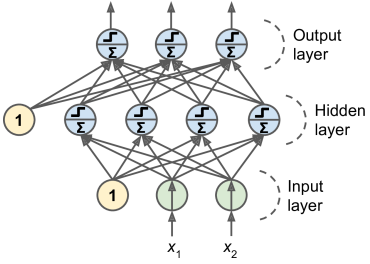

In [7]:
from IPython.display import Image
Image("ann.png")

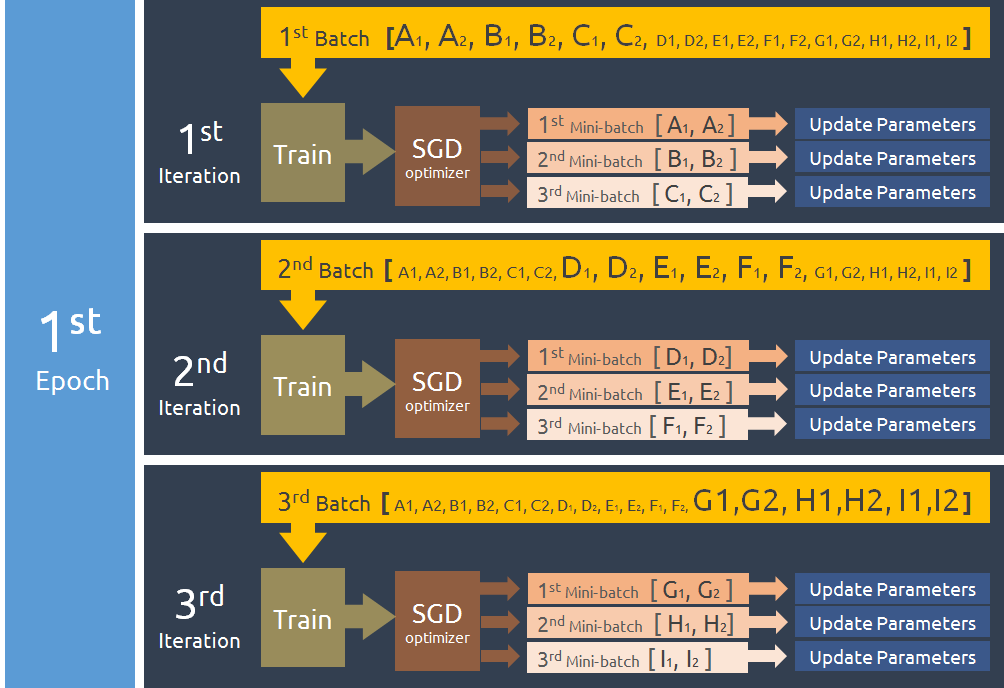

In [9]:
Image("fig-00001.png")

In [10]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [12]:
keras.__version__

'2.7.0'

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[1]]

'T-shirt/top'

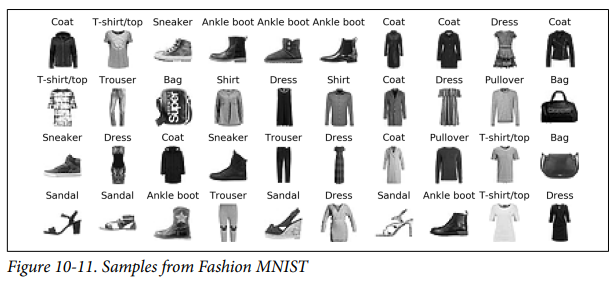

In [20]:
Image("fig-00002.png")

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.layers

In [42]:
hidden1 = model.layers[1]

In [43]:
hidden1.name

'dense_6'

In [44]:
hidden2 = model.layers[0]

In [45]:
hidden2.name

'flatten_2'

In [46]:
model.get_layer('dense_6') is hidden1

True

In [47]:
weights, biases = hidden1.get_weights()

In [48]:
weights

array([[-0.03808314,  0.03364874,  0.03979828, ..., -0.03070956,
        -0.01512104, -0.00131748],
       [ 0.00176697, -0.06888825, -0.00697757, ..., -0.01852721,
        -0.0630336 ,  0.0594075 ],
       [-0.00884148, -0.00797997, -0.04729875, ...,  0.0219596 ,
         0.0043708 , -0.03737228],
       ...,
       [ 0.02184713, -0.0741079 , -0.06949613, ...,  0.00968511,
         0.00875437,  0.01753975],
       [ 0.03748908,  0.02345065, -0.01305978, ...,  0.06505394,
        -0.01717647, -0.068055  ],
       [-0.02700012, -0.06271486, -0.02749052, ...,  0.07105403,
         0.06445237, -0.04149416]], dtype=float32)

In [49]:
weights.shape

(784, 300)

In [50]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
biases.shape

(300,)

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7094 - accuracy: 0.7662 - val_loss: 0.4956 - val_accuracy: 0.8352
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4864 - accuracy: 0.8287 - val_loss: 0.4408 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8433 - val_loss: 0.4437 - val_accuracy: 0.8450
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4155 - accuracy: 0.8542 - val_loss: 0.4081 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8606 - val_loss: 0.3795 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8649 - val_loss: 0.3759 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8705 - val_loss: 0.3804 - val_accuracy:

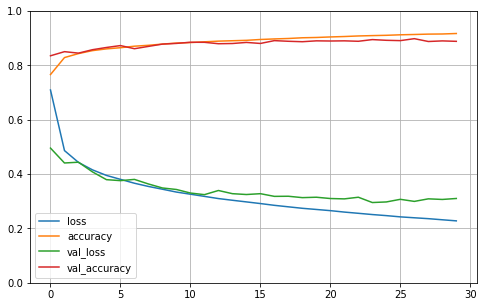

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 55.4986 - accuracy: 0.8620


[55.498600006103516, 0.8619999885559082]

# #prediction

In [72]:
X_new = X_test[:3]

In [73]:
y_proba = model.predict(X_new)

In [74]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
y_pred = y_proba.argmax(axis=-1) ##y_pred = model.predict_classes(X_new) < tf2.6

In [78]:
y_pred

array([9, 2, 1], dtype=int64)

In [80]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# #Building a Regression MLP Using the Sequential API

In [82]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [85]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0125 - val_loss: 0.6489
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5479 - val_loss: 0.5178
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4536 - val_loss: 0.4952
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4410 - val_loss: 0.5521
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4428 - val_loss: 0.4723
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4637
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - val_loss: 0.4524
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4052 - val_loss: 0.4481
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.4408
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4156 - val_loss: 0.4415

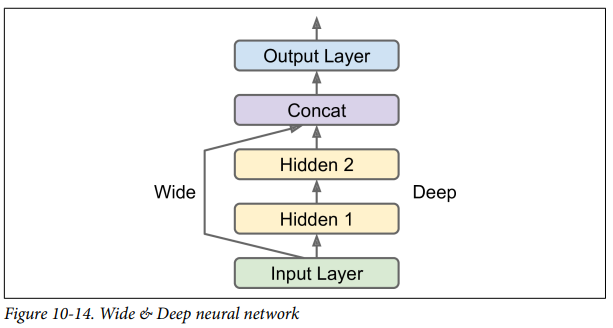

In [86]:
Image("fig-00003.png")

In [87]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

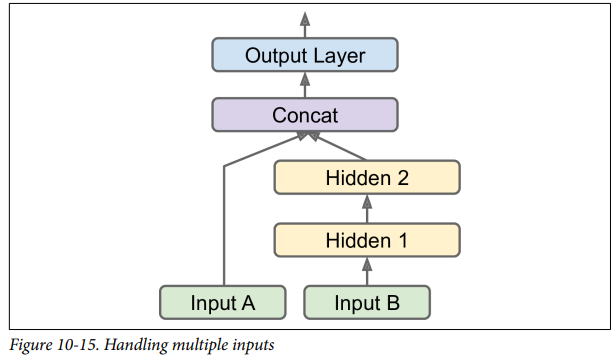

In [88]:
Image("fig-00004.png")

In [89]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [90]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

C:\Users\fever\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5555 - val_loss: 1.2007
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9181 - val_loss: 0.8463
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7264 - val_loss: 0.7540
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6664 - val_loss: 0.7116
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6339 - val_loss: 0.6827
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6088 - val_loss: 0.6586
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5876 - val_loss: 0.6368
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5685 - val_loss: 0.6177
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 0.6027
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5399 - val_loss: 0.5898

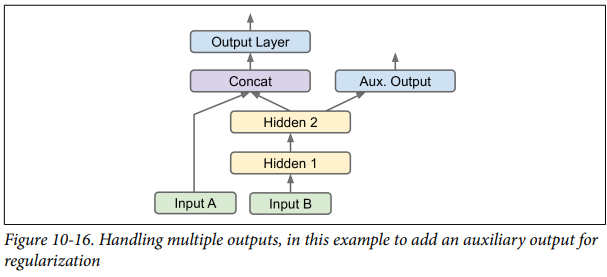

In [91]:
Image("fig-00005.png")

In [92]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [93]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [94]:
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=20,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8404 - main_output_loss: 0.7326 - aux_output_loss: 1.8111 - val_loss: 0.5904 - val_main_output_loss: 0.5228 - val_aux_output_loss: 1.1992
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5319 - main_output_loss: 0.4683 - aux_output_loss: 1.1038 - val_loss: 0.5602 - val_main_output_loss: 0.5032 - val_aux_output_loss: 1.0733
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5122 - main_output_loss: 0.4587 - aux_output_loss: 0.9938 - val_loss: 0.5378 - val_main_output_loss: 0.4896 - val_aux_output_loss: 0.9714
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4900 - main_output_loss: 0.4440 - aux_output_loss: 0.9046 - val_loss: 0.5127 - val_main_output_loss: 0.4728 - val_aux_output_loss: 0.8722
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4705 - main_output_loss: 0.4317 - aux_output_loss: 0.8197 - val_loss

In [95]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3767 - main_output_loss: 0.3603 - aux_output_loss: 0.5235


In [96]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# #Using the Subclassing API to Build Dynamic Models

In [99]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()


# #Using TensorBoard for Visualization

In [103]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid),
 callbacks=[tensorboard_cb])

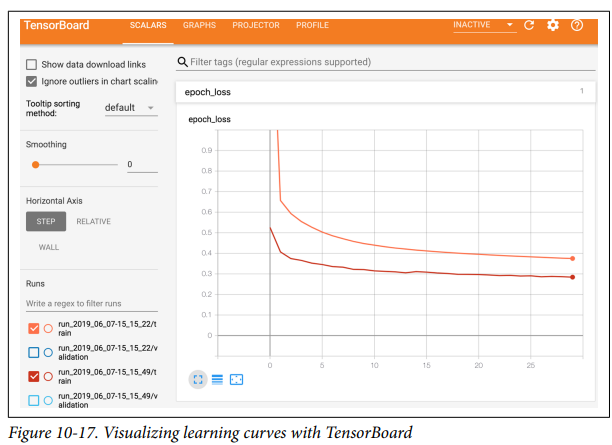

In [106]:
Image("fig-00006.png")

# #Fine-Tuning Neural Network Hyperparameters

In [111]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [112]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\fever\AppData\Local\Temp\ipykernel_49964\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [113]:
keras_reg.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0739 - val_loss: 0.7760
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6768 - val_loss: 0.6570
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6016 - val_loss: 0.5876
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5395 - val_loss: 0.5559
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4998 - val_loss: 0.5360
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4810 - val_loss: 0.5286
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4667 - val_loss: 0.5090
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4604 - val_loss: 0.5019
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4501 - val_loss: 0.4959
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4447 - val_lo

In [114]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 7.0040 - val_loss: 5.2938
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 4.2255 - val_loss: 3.3458
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 2.7183 - val_loss: 2.2651
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8782 - val_loss: 1.6502
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3995 - val_loss: 1.2937
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1222 - val_loss: 1.0833
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9579 - val_loss: 0.9557
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8587 - val_loss: 0.8772
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7974 - val_loss: 0.8271
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7582 - val_lo

242/242 [==============================] - 0s 2ms/step - loss: 0.5027 - val_loss: 0.5661
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5028 - val_loss: 0.5657
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5026 - val_loss: 0.5658
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5024 - val_loss: 0.5658
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5023 - val_loss: 0.5654
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5021 - val_loss: 0.5654
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5019 - val_loss: 0.5649
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5017 - val_loss: 0.5645
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5016 - val_loss: 0.5643
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5014 - val_loss: 

Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5860 - val_loss: 0.6355
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5842 - val_loss: 0.6338
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5825 - val_loss: 0.6322
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5808 - val_loss: 0.6302
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5792 - val_loss: 0.6285
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.6268
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5761 - val_loss: 0.6256
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5746 - val_loss: 0.6237
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5732 - val_loss: 0.6223
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5718

242/242 [==============================] - 0s 2ms/step - loss: 0.4414 - val_loss: 0.4957
Epoch 100/100
121/121 [==============================] - 0s 900us/step - loss: 0.4512
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.5670 - val_loss: 2.3434
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6355 - val_loss: 1.3942
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0767 - val_loss: 1.0558
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8558 - val_loss: 0.9043
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7516 - val_loss: 0.8274
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6974 - val_loss: 0.7842
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6659 - val_loss: 0.7570
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6462 - val_loss: 0.7378
Epoch 9/100
242/2

Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4299 - val_loss: 0.4993
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4292 - val_loss: 0.4986
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4285 - val_loss: 0.4979
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4278 - val_loss: 0.4970
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4272 - val_loss: 0.4966
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4265 - val_loss: 0.4960
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4259 - val_loss: 0.4948
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4252 - val_loss: 0.4944
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4247 - val_loss: 0.4936
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4241

242/242 [==============================] - 0s 2ms/step - loss: 317555450776125440.0000 - val_loss: 2674043065076809728.0000
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 42888768811914231808.0000 - val_loss: 431227897463793778688.0000
Epoch 11/100
121/121 [==============================] - 0s 837us/step - loss: 264517320832138738663424.0000
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.3262 - val_loss: 2.2812
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5055 - val_loss: 1.1469
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9238 - val_loss: 0.8765
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7778 - val_loss: 0.7914
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7257 - val_loss: 0.7528
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6966 - val_loss: 0.7275
Epoch 7/100
242/242 [

Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5276 - val_loss: 0.5797
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5223 - val_loss: 0.5784
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5242 - val_loss: 0.5766
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5201 - val_loss: 0.5807
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5202 - val_loss: 0.5807
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5150 - val_loss: 0.5734
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5157 - val_loss: 0.5768
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5146 - val_loss: 0.5713
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5144 - val_loss: 0.5751
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5162

242/242 [==============================] - 0s 2ms/step - loss: 0.5013 - val_loss: 0.5579
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5000 - val_loss: 0.5629
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5016 - val_loss: 0.5630
Epoch 94/100
121/121 [==============================] - 0s 871us/step - loss: 0.5418
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.3887 - val_loss: 2.2669
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4511 - val_loss: 1.0251
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8200 - val_loss: 0.7572
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6785 - val_loss: 0.6889
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6380 - val_loss: 0.6637
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6206 - val_loss: 0.6503
Epoch 7/100
242/

Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5283 - val_loss: 0.5669
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5268 - val_loss: 0.5629
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5286 - val_loss: 0.5655
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5271 - val_loss: 0.5625
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5288 - val_loss: 0.5661
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5268 - val_loss: 0.5628
Epoch 83/100
121/121 [==============================] - 0s 883us/step - loss: 0.4940
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.1829 - val_loss: 2.7916
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0202 - val_loss: 1.6374
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3099 - val_loss: 1.2224


242/242 [==============================] - 0s 2ms/step - loss: 0.4885 - val_loss: 0.5619
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4865 - val_loss: 0.5598
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4847 - val_loss: 0.5577
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4828 - val_loss: 0.5557
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4810 - val_loss: 0.5538
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4793 - val_loss: 0.5517
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4776 - val_loss: 0.5499
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4760 - val_loss: 0.5484
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4744 - val_loss: 0.5466
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4729 - val_loss: 

Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5700 - val_loss: 0.6130
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5671 - val_loss: 0.6097
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5642 - val_loss: 0.6067
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5616 - val_loss: 0.6042
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5589 - val_loss: 0.6015
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5564 - val_loss: 0.5987
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5539 - val_loss: 0.5965
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.5936
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5493 - val_loss: 0.5912
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5470

KeyboardInterrupt: 

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

# #2

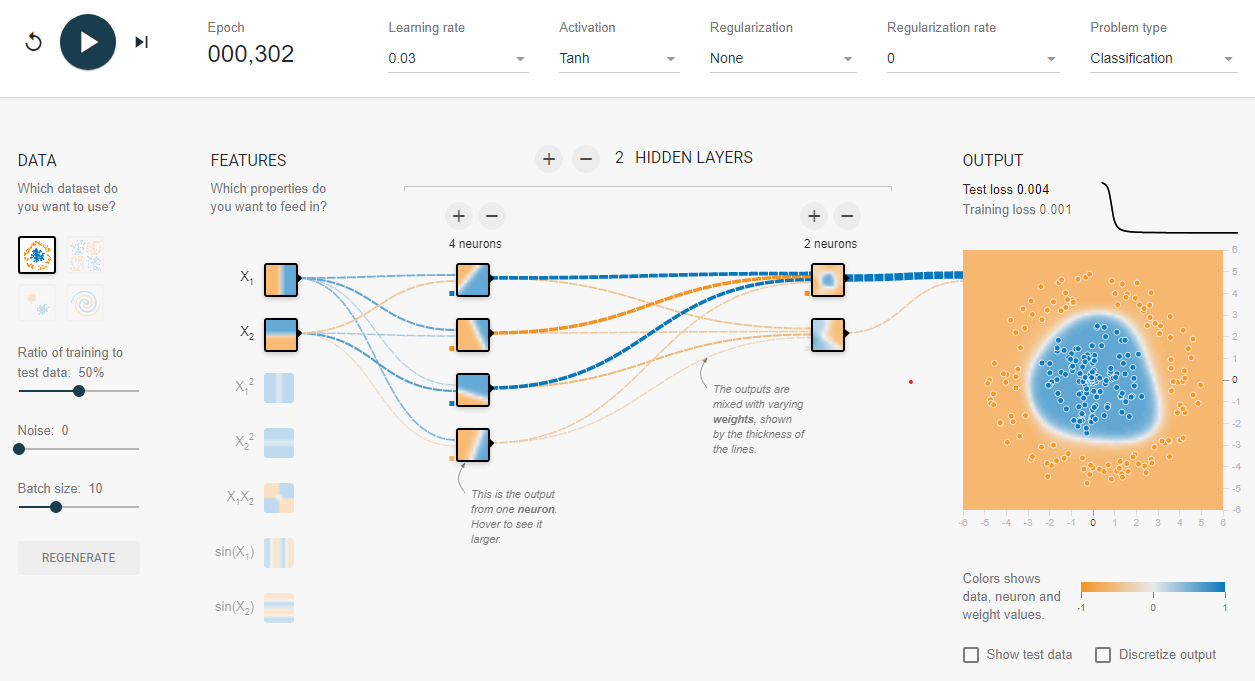

In [3]:
from IPython.display import Image
Image("fig-00007.png")

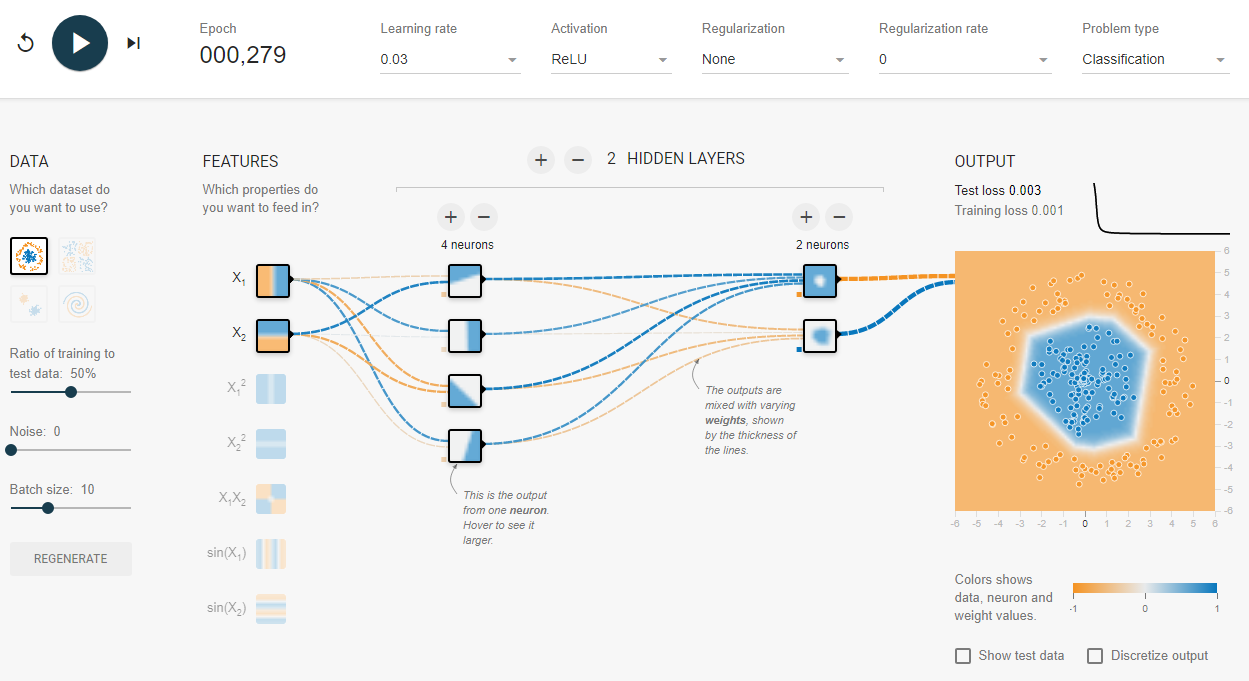

In [4]:
Image("fig-00008.png")

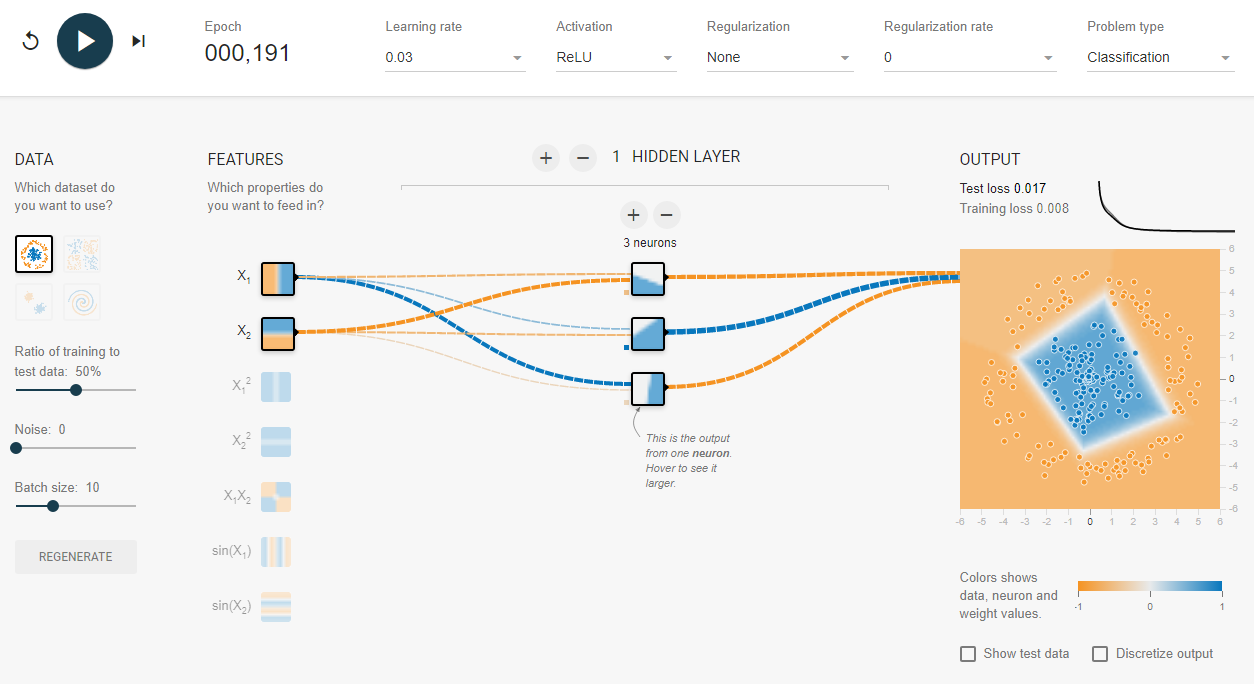

In [5]:
Image("fig-00009.png")

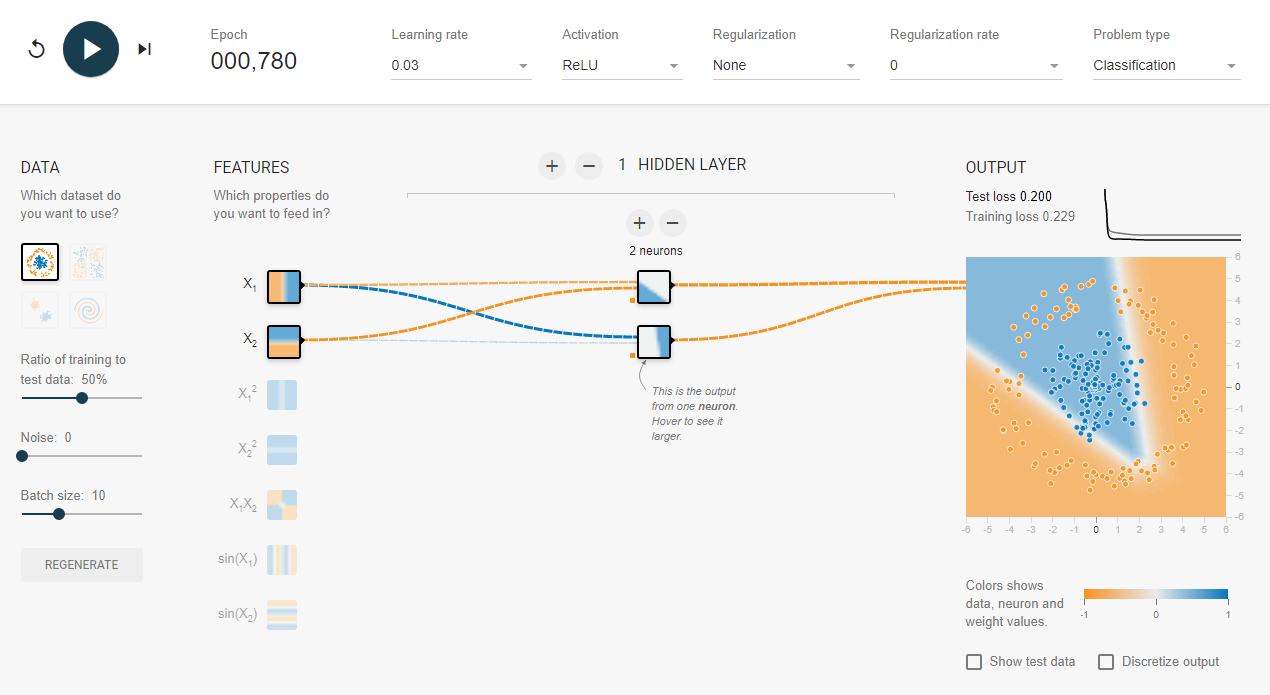

In [6]:
Image("fig-00010.png")

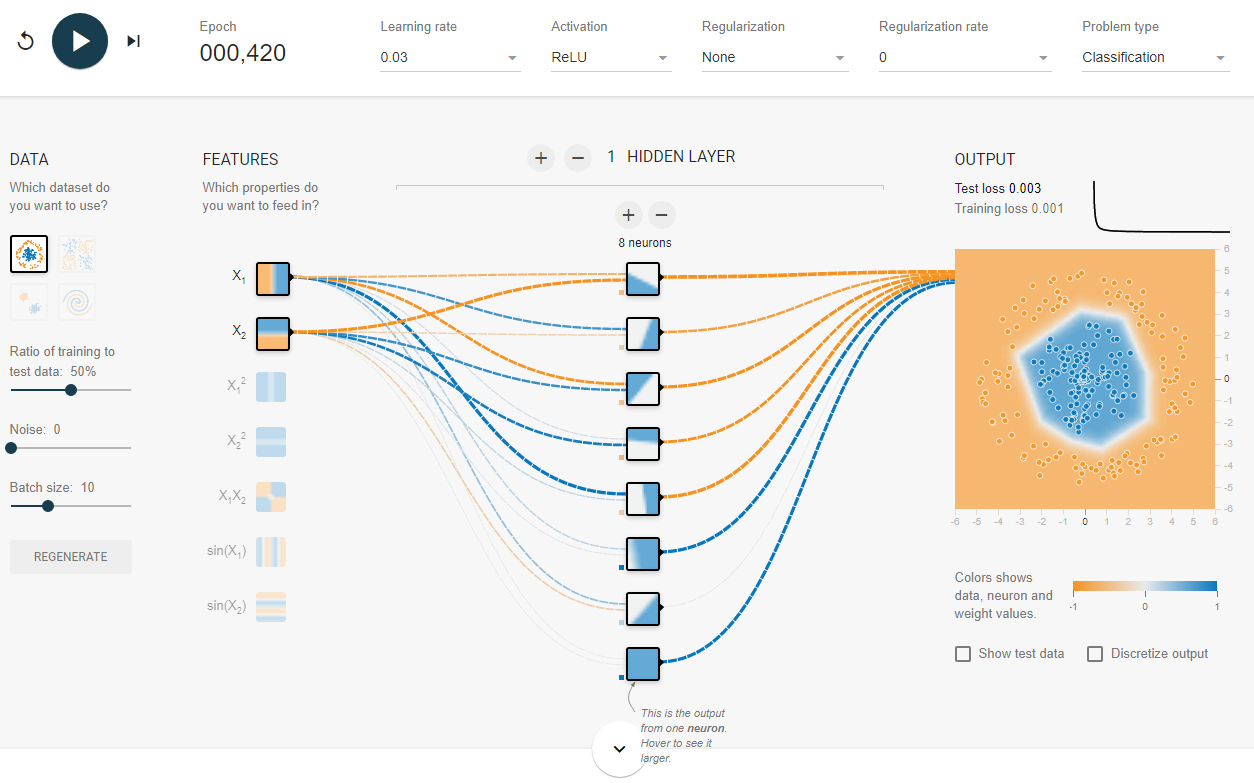

In [7]:
Image("fig-00011.png")

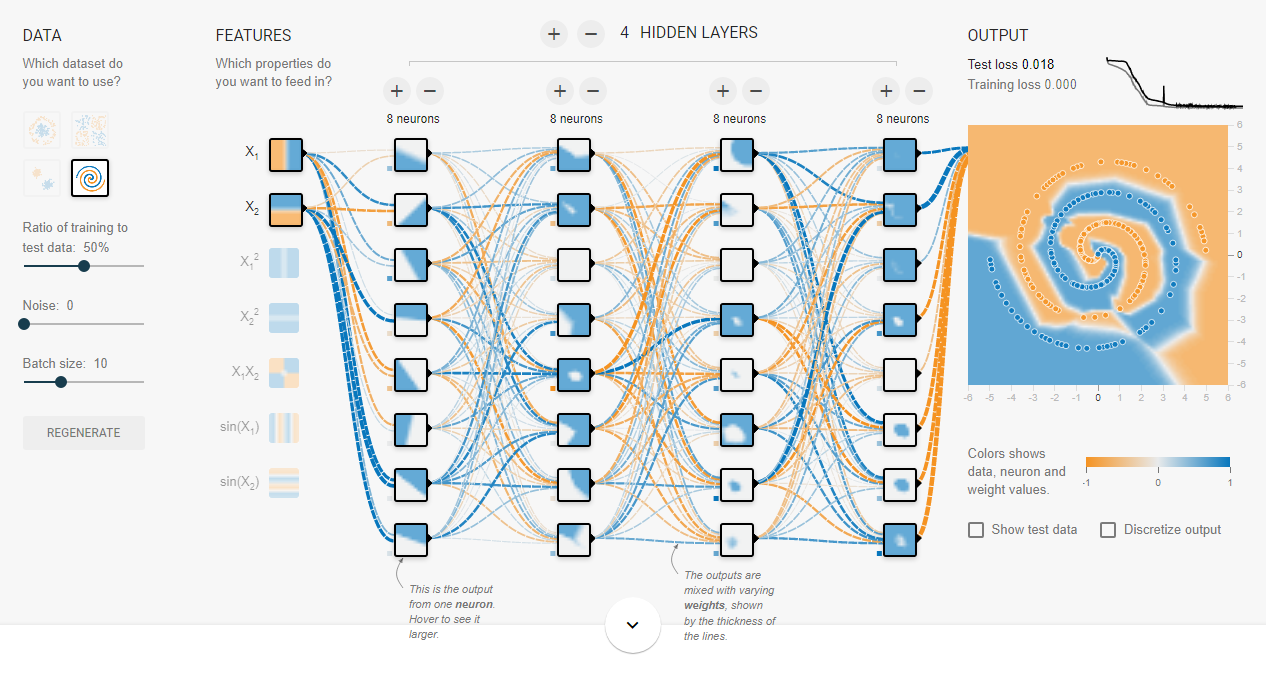

In [8]:
Image("fig-00012.png")

# #3

- Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

1. What is the shape of the input matrix X? 

        (m X 10), m is the training batch size.

2. What are the shape of hidden layer's weight vector Wh, and the shape of its bias vector bh?

    
        Wh : (10 X 50)
        bh : (50 X 1)

3. What are the shape of output layer's weight vector Wo, and the shape of its bias vector bo?

        Wo : (50 X 3)
        bo : (3 X 1)

4. What is the shape of the network's output matrix Y？

        (m X 3)

5. Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, and bo.

        Y = (X·Wh + bh)·Wo + bo

- What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

    Backpropagation (backprop) is a widely used algorithm for training feedforward neural networks. Generalizations of backpropagation exist for other artificial neural networks (ANNs), and for functions generally. These classes of algorithms are all referred to generically as "backpropagation". It first computes the gradient of the cost function with regards to every model parameters, and then it performs a Gradient Descent step using this gradients.

    Backpropagation of errors in multilayer perceptrons, a technique used in machine learning, is a special case of reverse mode AD.

In [16]:
a = 4
b = 3
c = a + b  # = 4 + 3 = 7
d = a * c  # = 4 * 7 = 28

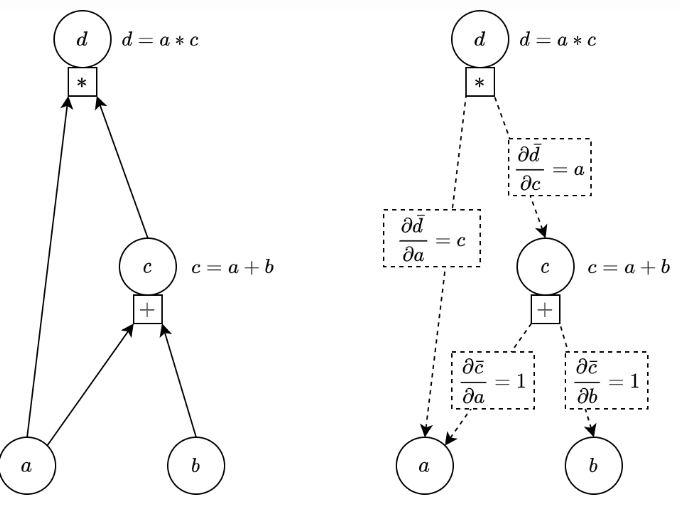

In [18]:
Image("fig-00013.png")

- Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak thest hyperparameters to try to solve the problem?

        Number of hidden layer
        Number of neuron per layer
        Activation function.

In [23]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               